---
title: "Plot The Receiving Operating Characteristic Curve"
description: ""
tags: machine_learning, model_evaluation
URL: https://github.com/chrisalbon/notes
Licence: 
Creator: 
Meta: 

---

 <div>
    	<img src="./coco.png" style="float: left;height: 55px">
    	<div style="height: 75px;text-align: center; padding-top:5px">
        <h1>
      	Plot The Receiving Operating Characteristic Curve
        </h1>
        <p></p>
    	</div>
		</div> 

<a alt="ROC Curve" href="https://machinelearningflashcards.com">
    <img src="/images/machine_learning_flashcards/Receiver_Operating_Characteristic_print.png" class="flashcard center-block">
</a>

## Preliminaries

In [1]:
# Load libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Generate Features And Target

In [2]:
# Create feature matrix and target vector
X, y = make_classification(n_samples=10000, 
                           n_features=10, 
                           n_classes=2, 
                           n_informative=3,
                           random_state=3)

## Split Data Intro Training And Test Sets

In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## Training Binary Classifier

In [4]:
# Create classifier
clf = LogisticRegression()

# Train model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Create Predicted Probabilities

In [5]:
# Get predicted probabilities
y_score = clf.predict_proba(X_test)[:,1]

## Plot Receiving Operating Characteristic Curve

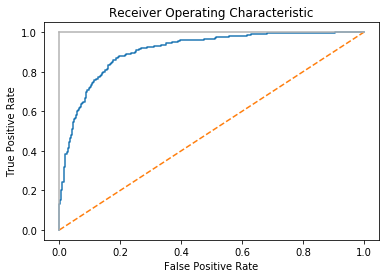

In [6]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()